# SDA - lecture 3 - Poisson processes

In [5]:
import math
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [6]:
# Generate a "spike train" of a neuron 
samp = 1000
rate = 20 / samp
duration = 100

spk_array = (np.random.uniform(size=samp*duration)<rate).astype(np.int32)
time_array = np.arange(0, duration, 1/samp)

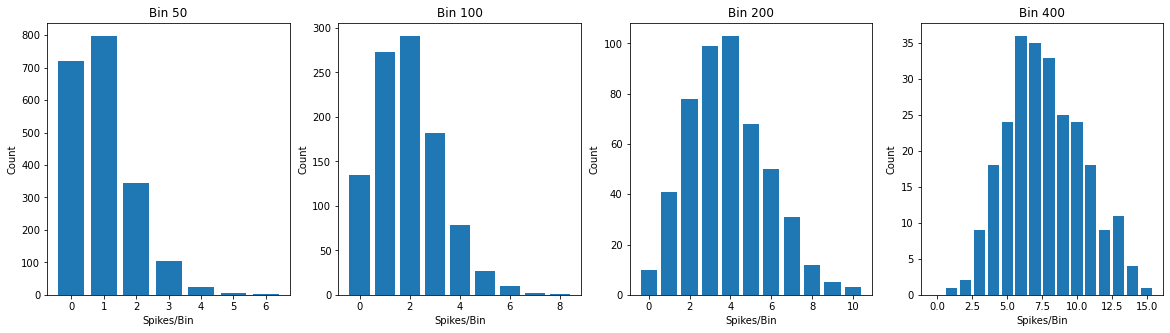

In [43]:
bin_range = [50, 100,200,400]
fig, ax = plt.subplots(figsize=(5*len(bin_range),5), nrows=1, ncols=len(bin_range))

for a, bin_size in enumerate(bin_range):
    bin_array = np.zeros(math.ceil(samp*duration/bin_size))
    for i, s in enumerate(np.arange(0, samp*duration, bin_size)):
        bin_array[i] = spk_array[s:s+bin_size].sum()
    hist_vals, hist_bins = np.histogram(bin_array, bins = np.arange(0, bin_array.max()+2))
    ax[a].bar(hist_bins[0:-1],hist_vals)
    ax[a].set_xlabel('Spikes/Bin')
    ax[a].set_ylabel('Count')
    ax[a].set_title(f'Bin {bin_size}')